In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÅÍµ¨"
region_code = "10"
target_date = "2023-01-12"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÅÍµ¨2023_1q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2023-01-12   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg  10425     Î∂ÅÍµ¨  10900     Î∂ÅÍµ¨   
1   2023-01-12     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5800     Î∂ÅÍµ¨   6980     Î∂ÅÍµ¨   
2   2023-01-12     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   7000     Î∂ÅÍµ¨  19875     Î∂ÅÍµ¨   
3   2023-01-12    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4000     Î∂ÅÍµ¨   4400     Î∂ÅÍµ¨   
4   2023-01-12     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3900     Î∂ÅÍµ¨   4193     Î∂ÅÍµ¨   
5   2023-01-12    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   9083     Î∂ÅÍµ¨  11800     Î∂ÅÍµ¨   
6   2023-01-12     ÎåÄÌåå                      1.0„éè   3100     Î∂ÅÍµ¨   4240     Î∂ÅÍµ¨   
7   2023-01-12   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  11950     Î∂ÅÍµ¨  12450     Î∂ÅÍµ¨   
8   2023-01-12     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   1500     Î∂ÅÍµ¨   5194     Î∂ÅÍµ¨   
9   2023-01-12     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    820     Î∂ÅÍµ¨    820     Î∂ÅÍµ¨   
10  2023-01-12     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1550     Î∂ÅÍµ¨   1580     Î∂ÅÍµ¨   
11  2023-01-12      Î¨¥                   2.0„éè 1Í∞ú   1680     Î∂ÅÍµ¨   1800     Î∂ÅÍµ¨   
12  2023-01-12    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   4600     Î∂ÅÍµ¨   4750     Î∂ÅÍµ¨   
13  2023-01-12     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   3380     Î∂ÅÍµ¨   3970     Î∂ÅÍµ¨   
14  2023-01-12      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  19800     Î∂ÅÍµ¨  23000     Î∂ÅÍµ¨   
15  2023-01-12     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2400     Î∂ÅÍµ¨   3500     Î∂ÅÍµ¨   
16  2023-01-12  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3990     Î∂ÅÍµ¨   9255     Î∂ÅÍµ¨   
17  2023-01-12   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  15900     Î∂ÅÍµ¨  16480     Î∂ÅÍµ¨   
18  2023-01-12     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  15800     Î∂ÅÍµ¨  22200     Î∂ÅÍµ¨   
19  2023-01-12    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2780     Î∂ÅÍµ¨   2816     Î∂ÅÍµ¨   
20  2023-01-12     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1980     Î∂ÅÍµ¨   1980     Î∂ÅÍµ¨   
21  2023-01-12     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1380     Î∂ÅÍµ¨   1390     Î∂ÅÍµ¨   
22  2023-01-12    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  54450     Î∂ÅÍµ¨  59000     Î∂ÅÍµ¨   
23  2023-01-12    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   7680     Î∂ÅÍµ¨   8280     Î∂ÅÍµ¨   
24  2023-01-12      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  42800     Î∂ÅÍµ¨  53900     Î∂ÅÍµ¨   
25  2023-01-12     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   3500     Î∂ÅÍµ¨   3640     Î∂ÅÍµ¨   
26  2023-01-12    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   7980     Î∂ÅÍµ¨   8611     Î∂ÅÍµ¨   
27  2023-01-12     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    870     Î∂ÅÍµ¨    930     Î∂ÅÍµ¨   
28  2023-01-12    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7580     Î∂ÅÍµ¨   9280     Î∂ÅÍµ¨   
29  2023-01-12   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2650     Î∂ÅÍµ¨   3000     Î∂ÅÍµ¨   
30  2023-01-12     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2980     Î∂ÅÍµ¨   3730     Î∂ÅÍµ¨   
31  2023-01-12    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  13609     Î∂ÅÍµ¨  15500     Î∂ÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0     475    4.56%  10,663  
1    1180   20.34%   6,390  
2   12875  183.93%  13,438  
3     400    10.0%   4,200  
4     293    7.51%   4,047  
5    2717   29.91%  10,442  
6    1140   36.77%   3,670  
7     500    4.18%  12,200  
8    3694  246.27%   3,347  
9       0     0.0%     820  
10     30    1.94%   1,565  
11    120    7.14%   1,740  
12    150    3.26%   4,675  
13    590   17.46%   3,675  
14   3200   16.16%  21,400  
15   1100   45.83%   2,950  
16   5265  131.95%   6,623  
17    580    3.65%  1

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÅÍµ¨"
region_code = "10"
target_date = "2023-04-13"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÅÍµ¨2023_2q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2023-04-13   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg  10425     Î∂ÅÍµ¨  10900     Î∂ÅÍµ¨   
1   2023-04-13     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5800     Î∂ÅÍµ¨   6980     Î∂ÅÍµ¨   
2   2023-04-13     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   6500     Î∂ÅÍµ¨  12375     Î∂ÅÍµ¨   
3   2023-04-13    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4990     Î∂ÅÍµ¨   5500     Î∂ÅÍµ¨   
4   2023-04-13     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3900     Î∂ÅÍµ¨   3933     Î∂ÅÍµ¨   
5   2023-04-13    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   9158     Î∂ÅÍµ¨  11400     Î∂ÅÍµ¨   
6   2023-04-13     ÎåÄÌåå                      1.0„éè   2280     Î∂ÅÍµ¨   3490     Î∂ÅÍµ¨   
7   2023-04-13   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9950     Î∂ÅÍµ¨  13400     Î∂ÅÍµ¨   
8   2023-04-13     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   1500     Î∂ÅÍµ¨   5194     Î∂ÅÍµ¨   
9   2023-04-13     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    820     Î∂ÅÍµ¨    820     Î∂ÅÍµ¨   
10  2023-04-13     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1550     Î∂ÅÍµ¨   1580     Î∂ÅÍµ¨   
11  2023-04-13      Î¨¥                   2.0„éè 1Í∞ú    990     Î∂ÅÍµ¨   1480     Î∂ÅÍµ¨   
12  2023-04-13    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   4600     Î∂ÅÍµ¨   4750     Î∂ÅÍµ¨   
13  2023-04-13      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  18000     Î∂ÅÍµ¨  21800     Î∂ÅÍµ¨   
14  2023-04-13     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3290     Î∂ÅÍµ¨   4580     Î∂ÅÍµ¨   
15  2023-04-13  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3990     Î∂ÅÍµ¨   6611     Î∂ÅÍµ¨   
16  2023-04-13   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  15900     Î∂ÅÍµ¨  16480     Î∂ÅÍµ¨   
17  2023-04-13     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  16000     Î∂ÅÍµ¨  22200     Î∂ÅÍµ¨   
18  2023-04-13    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2816     Î∂ÅÍµ¨   3380     Î∂ÅÍµ¨   
19  2023-04-13     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1980     Î∂ÅÍµ¨   1980     Î∂ÅÍµ¨   
20  2023-04-13     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1380     Î∂ÅÍµ¨   1390     Î∂ÅÍµ¨   
21  2023-04-13    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  34900     Î∂ÅÍµ¨  56900     Î∂ÅÍµ¨   
22  2023-04-13    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   8480     Î∂ÅÍµ¨   8480     Î∂ÅÍµ¨   
23  2023-04-13      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  43800     Î∂ÅÍµ¨  44900     Î∂ÅÍµ¨   
24  2023-04-13     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2980     Î∂ÅÍµ¨   3140     Î∂ÅÍµ¨   
25  2023-04-13    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   7980     Î∂ÅÍµ¨  10264     Î∂ÅÍµ¨   
26  2023-04-13     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    870     Î∂ÅÍµ¨    930     Î∂ÅÍµ¨   
27  2023-04-13    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7580     Î∂ÅÍµ¨   8680     Î∂ÅÍµ¨   
28  2023-04-13   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2650     Î∂ÅÍµ¨   3000     Î∂ÅÍµ¨   
29  2023-04-13     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   3730     Î∂ÅÍµ¨   3730     Î∂ÅÍµ¨   
30  2023-04-13    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  13609     Î∂ÅÍµ¨  15500     Î∂ÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0     475    4.56%  10,663  
1    1180   20.34%   6,390  
2    5875   90.38%   9,438  
3     510   10.22%   5,245  
4      33    0.85%   3,917  
5    2242   24.48%  10,279  
6    1210   53.07%   2,885  
7    3450   34.67%  11,675  
8    3694  246.27%   3,347  
9       0     0.0%     820  
10     30    1.94%   1,565  
11    490   49.49%   1,235  
12    150    3.26%   4,675  
13   3800   21.11%  19,900  
14   1290   39.21%   3,935  
15   2621   65.69%   5,301  
16    580    3.65%  16,190  
17   6200   38.75%  19,100  
18    564   20.03%   3,098  
19      0     0.0%   1,980  
20     10    0.72%   1,385  
21

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÅÍµ¨"
region_code = "10"
target_date = "2023-07-13"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÅÍµ¨2023_3q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2023-07-13   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg  10425     Î∂ÅÍµ¨  10900     Î∂ÅÍµ¨   
1   2023-07-13     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5800     Î∂ÅÍµ¨   6980     Î∂ÅÍµ¨   
2   2023-07-13     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   7000     Î∂ÅÍµ¨  12375     Î∂ÅÍµ¨   
3   2023-07-13    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4133     Î∂ÅÍµ¨   4900     Î∂ÅÍµ¨   
4   2023-07-13     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3900     Î∂ÅÍµ¨   3933     Î∂ÅÍµ¨   
5   2023-07-13    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   9083     Î∂ÅÍµ¨  11900     Î∂ÅÍµ¨   
6   2023-07-13     ÎåÄÌåå                      1.0„éè   2480     Î∂ÅÍµ¨   3740     Î∂ÅÍµ¨   
7   2023-07-13   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  13450     Î∂ÅÍµ¨  16900     Î∂ÅÍµ¨   
8   2023-07-13     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   1500     Î∂ÅÍµ¨   5073     Î∂ÅÍµ¨   
9   2023-07-13     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    780     Î∂ÅÍµ¨    780     Î∂ÅÍµ¨   
10  2023-07-13     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1550     Î∂ÅÍµ¨   1580     Î∂ÅÍµ¨   
11  2023-07-13      Î¨¥                   2.0„éè 1Í∞ú   1890     Î∂ÅÍµ¨   1980     Î∂ÅÍµ¨   
12  2023-07-13    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   4600     Î∂ÅÍµ¨   4750     Î∂ÅÍµ¨   
13  2023-07-13     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   7900     Î∂ÅÍµ¨  10900     Î∂ÅÍµ¨   
14  2023-07-13      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  18000     Î∂ÅÍµ¨  27000     Î∂ÅÍµ¨   
15  2023-07-13     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3322     Î∂ÅÍµ¨   6680     Î∂ÅÍµ¨   
16  2023-07-13  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3990     Î∂ÅÍµ¨   7388     Î∂ÅÍµ¨   
17  2023-07-13   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  16330     Î∂ÅÍµ¨  16480     Î∂ÅÍµ¨   
18  2023-07-13     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  16000     Î∂ÅÍµ¨  33360     Î∂ÅÍµ¨   
19  2023-07-13    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2816     Î∂ÅÍµ¨   3380     Î∂ÅÍµ¨   
20  2023-07-13     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1980     Î∂ÅÍµ¨   1980     Î∂ÅÍµ¨   
21  2023-07-13     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1380     Î∂ÅÍµ¨   1390     Î∂ÅÍµ¨   
22  2023-07-13    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  49000     Î∂ÅÍµ¨  54900     Î∂ÅÍµ¨   
23  2023-07-13    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   7480     Î∂ÅÍµ¨   8480     Î∂ÅÍµ¨   
24  2023-07-13      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  46800     Î∂ÅÍµ¨  49900     Î∂ÅÍµ¨   
25  2023-07-13     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2930     Î∂ÅÍµ¨   3450     Î∂ÅÍµ¨   
26  2023-07-13    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   7980     Î∂ÅÍµ¨  12450     Î∂ÅÍµ¨   
27  2023-07-13     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    870     Î∂ÅÍµ¨    930     Î∂ÅÍµ¨   
28  2023-07-13    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   8680     Î∂ÅÍµ¨   8680     Î∂ÅÍµ¨   
29  2023-07-13   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2650     Î∂ÅÍµ¨   3000     Î∂ÅÍµ¨   
30  2023-07-13     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2600     Î∂ÅÍµ¨   3850     Î∂ÅÍµ¨   
31  2023-07-13    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  11655     Î∂ÅÍµ¨  15900     Î∂ÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0     475    4.56%  10,663  
1    1180   20.34%   6,390  
2    5375   76.79%   9,688  
3     767   18.56%   4,517  
4      33    0.85%   3,917  
5    2817   31.01%  10,492  
6    1260   50.81%   3,110  
7    3450   25.65%  15,175  
8    3573   238.2%   3,287  
9       0     0.0%     780  
10     30    1.94%   1,565  
11     90    4.76%   1,935  
12    150    3.26%   4,675  
13   3000   37.97%   9,400  
14   9000    50.0%  22,500  
15   3358  101.08%   5,001  
16   3398   85.16%   5,689  
17    150    0.92%  1

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÅÍµ¨"
region_code = "10"
target_date = "2023-10-12"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÅÍµ¨2023_4q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2023-10-12   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425     Î∂ÅÍµ¨  10900     Î∂ÅÍµ¨   
1   2023-10-12     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5800     Î∂ÅÍµ¨   7500     Î∂ÅÍµ¨   
2   2023-10-12     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   4000     Î∂ÅÍµ¨  14142     Î∂ÅÍµ¨   
3   2023-10-12    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4000     Î∂ÅÍµ¨   5250     Î∂ÅÍµ¨   
4   2023-10-12     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3990     Î∂ÅÍµ¨   4000     Î∂ÅÍµ¨   
5   2023-10-12    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   9083     Î∂ÅÍµ¨  10500     Î∂ÅÍµ¨   
6   2023-10-12     ÎåÄÌåå                      1.0„éè   2980     Î∂ÅÍµ¨   5130     Î∂ÅÍµ¨   
7   2023-10-12   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  14450     Î∂ÅÍµ¨  14800     Î∂ÅÍµ¨   
8   2023-10-12     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   1500     Î∂ÅÍµ¨   6164     Î∂ÅÍµ¨   
9   2023-10-12     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    780     Î∂ÅÍµ¨    780     Î∂ÅÍµ¨   
10  2023-10-12     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1550     Î∂ÅÍµ¨   1580     Î∂ÅÍµ¨   
11  2023-10-12      Î¨¥                   2.0„éè 1Í∞ú   1720     Î∂ÅÍµ¨   2290     Î∂ÅÍµ¨   
12  2023-10-12    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   4420     Î∂ÅÍµ¨   4750     Î∂ÅÍµ¨   
13  2023-10-12     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   7990     Î∂ÅÍµ¨   9220     Î∂ÅÍµ¨   
14  2023-10-12      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  25000     Î∂ÅÍµ¨  31800     Î∂ÅÍµ¨   
15  2023-10-12     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   7555     Î∂ÅÍµ¨   7980     Î∂ÅÍµ¨   
16  2023-10-12  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   4750     Î∂ÅÍµ¨   8900     Î∂ÅÍµ¨   
17  2023-10-12   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  16330     Î∂ÅÍµ¨  16480     Î∂ÅÍµ¨   
18  2023-10-12     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  25571     Î∂ÅÍµ¨  28000     Î∂ÅÍµ¨   
19  2023-10-12    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2316     Î∂ÅÍµ¨   2780     Î∂ÅÍµ¨   
20  2023-10-12     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   2380     Î∂ÅÍµ¨   2380     Î∂ÅÍµ¨   
21  2023-10-12     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1380     Î∂ÅÍµ¨   1390     Î∂ÅÍµ¨   
22  2023-10-12    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  49000     Î∂ÅÍµ¨  59900     Î∂ÅÍµ¨   
23  2023-10-12    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6980     Î∂ÅÍµ¨   8480     Î∂ÅÍµ¨   
24  2023-10-12      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  49800     Î∂ÅÍµ¨  63900     Î∂ÅÍµ¨   
25  2023-10-12     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   3300     Î∂ÅÍµ¨   3400     Î∂ÅÍµ¨   
26  2023-10-12    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   4333     Î∂ÅÍµ¨   7980     Î∂ÅÍµ¨   
27  2023-10-12     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    870     Î∂ÅÍµ¨    930     Î∂ÅÍµ¨   
28  2023-10-12    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   8680     Î∂ÅÍµ¨  10600     Î∂ÅÍµ¨   
29  2023-10-12   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2650     Î∂ÅÍµ¨   3000     Î∂ÅÍµ¨   
30  2023-10-12     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2980     Î∂ÅÍµ¨   3850     Î∂ÅÍµ¨   
31  2023-10-12    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  13609     Î∂ÅÍµ¨  15900     Î∂ÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    3475    46.8%   9,163  
1    1700   29.31%   6,650  
2   10142  253.55%   9,071  
3    1250   31.25%   4,625  
4      10    0.25%   3,995  
5    1417    15.6%   9,792  
6    2150   72.15%   4,055  
7     350    2.42%  14,625  
8    4664  310.93%   3,832  
9       0     0.0%     780  
10     30    1.94%   1,565  
11    570   33.14%   2,005  
12    330    7.47%   4,585  
13   1230   15.39%   8,605  
14   6800    27.2%  28,400  
15    425    5.63%   7,768  
16   4150   87.37%   6,825  
17    150    0.92%  1

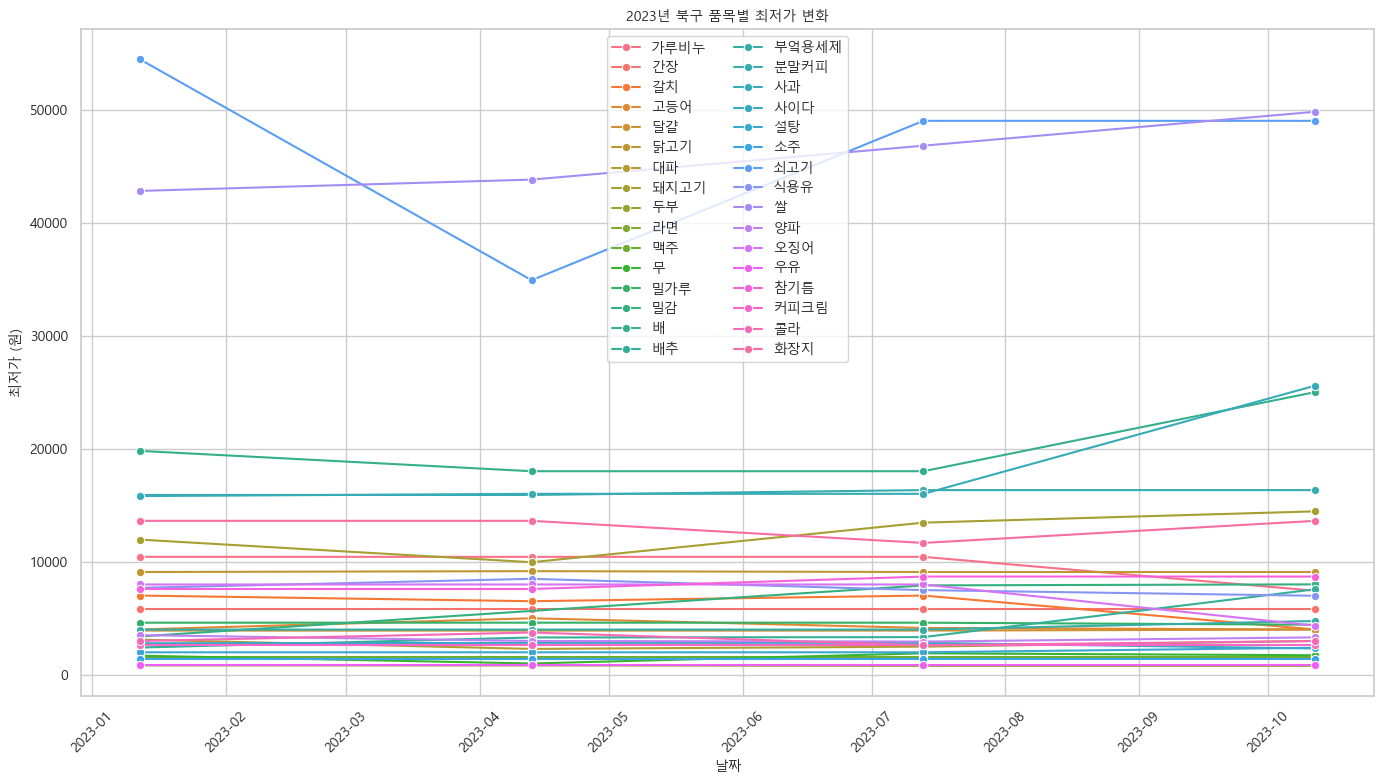

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Î∂ÅÍµ¨2023_1q.csv")
q2 = pd.read_csv("Î∂ÅÍµ¨2023_2q.csv")
q3 = pd.read_csv("Î∂ÅÍµ¨2023_3q.csv")
q4 = pd.read_csv("Î∂ÅÍµ¨2023_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2023ÎÖÑ Î∂ÅÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Î∂ÅÍµ¨2023_min.csv", index=False, encoding="utf-8-sig")

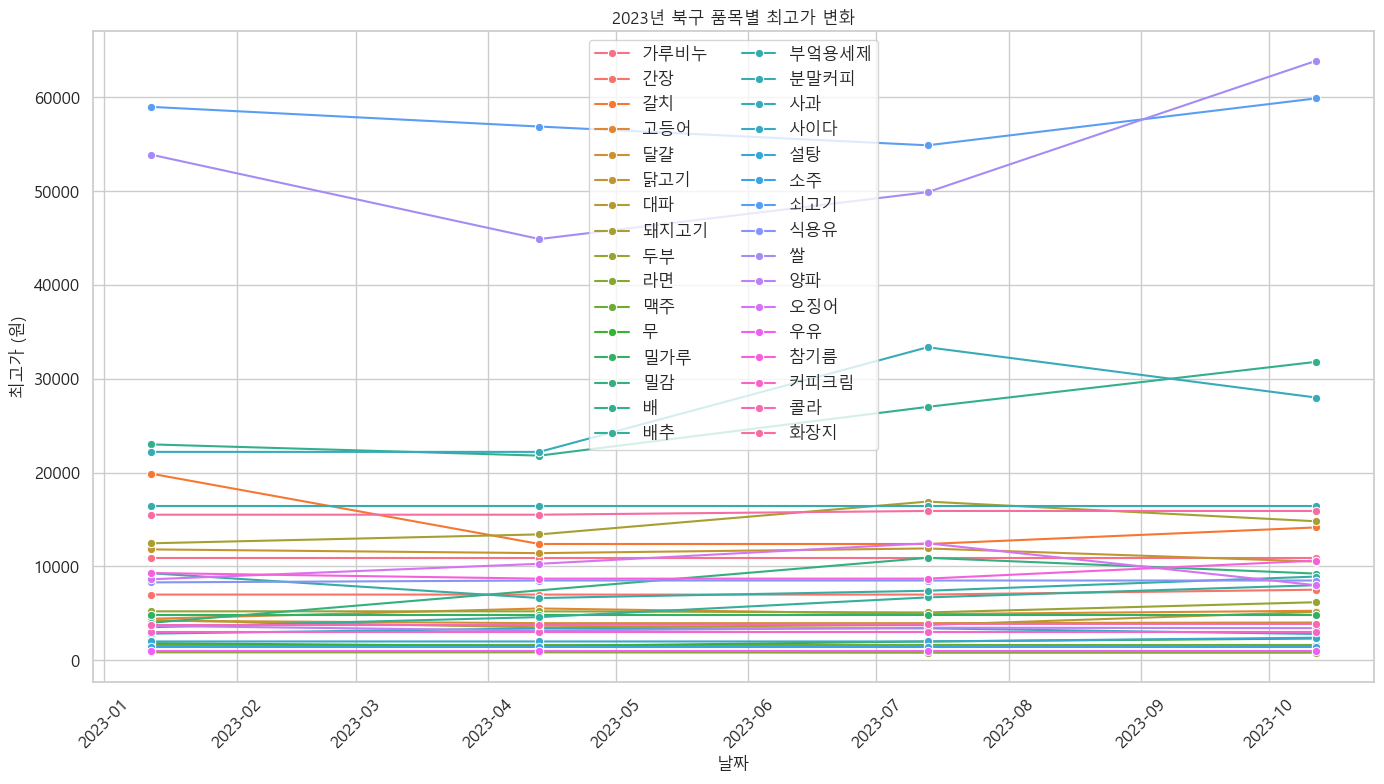

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Î∂ÅÍµ¨2023_1q.csv")
q2 = pd.read_csv("Î∂ÅÍµ¨2023_2q.csv")
q3 = pd.read_csv("Î∂ÅÍµ¨2023_3q.csv")
q4 = pd.read_csv("Î∂ÅÍµ¨2023_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2023ÎÖÑ Î∂ÅÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Î∂ÅÍµ¨2023_max.csv", index=False, encoding="utf-8-sig")